   Feature 1 Feature 2 Output
0          1         S      N
1          1         M      N
2          1         M      Y
3          1         S      Y
4          1         S      N
5          2         S      N
6          2         M      N
7          2         M      Y
8          2         L      Y
9          2         L      Y
10         3         L      Y
11         3         M      Y
12         3         M      Y
13         3         L      Y
14         3         L      N


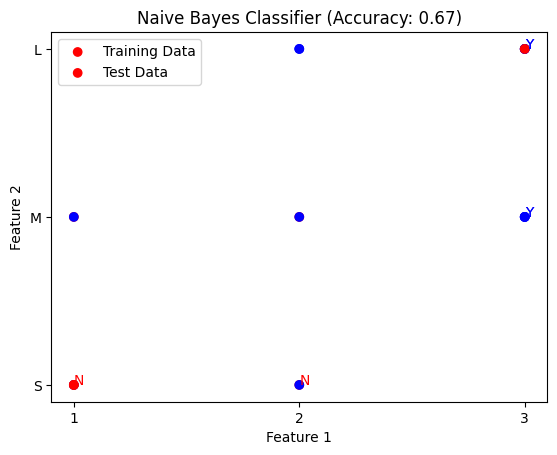

   Feature 1  Feature 2 Output
0          1          2    red
1          2          1    red
2          3          1    red
3          3          2    red
4          1          3   blue
5          2          4   blue
6          3          5   blue


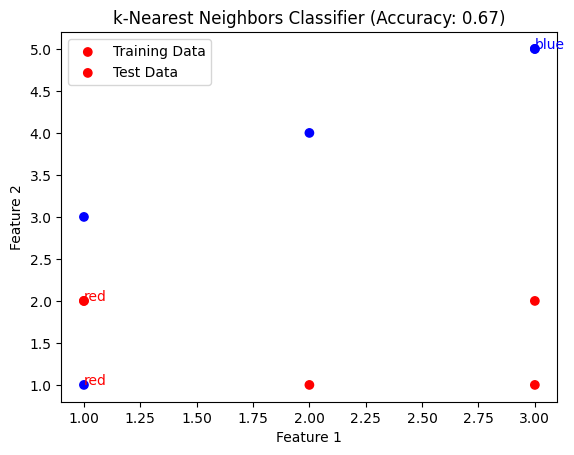

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_sample_data():
    # Generating sample data
    x_train = np.array([[1, 'S'], [1, 'M'], [1, 'M'], [1, 'S'], [1, 'S'],
                        [2, 'S'], [2, 'M'], [2, 'M'], [2, 'L'], [2, 'L'],
                        [3, 'L'], [3, 'M'], [3, 'M'], [3, 'L'], [3, 'L']])
    y_train = np.array(['N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N'])
    return x_train, y_train

def display_data(x_train, y_train):
    df = pd.DataFrame({'Feature 1': x_train[:, 0], 'Feature 2': x_train[:, 1], 'Output': y_train})
    print(df)

def calculate_prior_probabilities(y_train):
    # Calculating prior probabilities
    unique_labels, counts = np.unique(y_train, return_counts=True)
    prior_probabilities = dict(zip(unique_labels, counts / len(y_train)))
    return prior_probabilities

def calculate_likelihoods(x_train, y_train):
    # Calculating likelihoods
    likelihoods = {}
    features = np.unique(x_train[:, 0])
    for feature in features:
        likelihoods[feature] = {}
        for label in np.unique(y_train):
            count = np.sum((x_train[:, 0] == feature) & (y_train == label))
            likelihoods[feature][label] = count / np.sum(y_train == label)
    return likelihoods

def predict(x_train, y_train, x_test):
    prior_probabilities = calculate_prior_probabilities(y_train)
    likelihoods = calculate_likelihoods(x_train, y_train)
    predictions = []
    for x in x_test:
        posteriors = {}
        for label in np.unique(y_train):
            posterior = prior_probabilities[label]
            for i, feature in enumerate(x):
                if i == 0:
                    posterior *= likelihoods[feature][label]
                else:
                    count = np.sum((x_train[:, 1] == feature) & (y_train == label))
                    posterior *= count / np.sum(y_train == label)
            posteriors[label] = posterior
        predictions.append(max(posteriors, key=posteriors.get))
    return predictions

def plot_predictions(x_train, y_train, x_test, y_test):
    predictions = predict(x_train, y_train, x_test)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    
    colors = {'N': 'red', 'Y': 'blue'}
    
    plt.scatter(x_train[:, 0], x_train[:, 1], c=[colors[y] for y in y_train], label='Training Data')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=[colors[y] for y in y_test], label='Test Data')
    
    for i, prediction in enumerate(predictions):
        plt.annotate(prediction, (x_test[i, 0], x_test[i, 1]), color=colors[prediction])
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Naive Bayes Classifier (Accuracy: {accuracy:.2f})')
    plt.legend()
    plt.show()

# Generate sample data
x_train, y_train = generate_sample_data()

# Display the sample data
display_data(x_train, y_train)

# Test data
x_test = np.array([[1, 'S'], [2, 'S'], [3, 'M'],[3, 'M'], [3, 'L'], [3, 'L']])  # You can modify the test data as per your needs
y_test = np.array(['N', 'Y', 'Y' , 'Y' , 'Y' , 'N'])  # True labels for the test data

# Perform predictions and plot results
plot_predictions(x_train, y_train, x_test, y_test)

def generate_sample_data_knn():
    # Generating sample data
    x_train = np.array([[1, 2], [2, 1], [3, 1], [3, 2], [1, 3], [2, 4], [3, 5]])
    y_train = np.array(['red', 'red', 'red', 'red', 'blue', 'blue', 'blue'])
    return x_train, y_train

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def calculate_distances(x_train, x_test):
    distances = []
    for x in x_train:
        dist = euclidean_distance(x, x_test)
        distances.append(dist)
    return distances

def k_nearest_neighbors(x_train, y_train, x_test, k):
    distances = calculate_distances(x_train, x_test)
    indices = np.argsort(distances)[:k]
    neighbors = y_train[indices]
    unique_labels, counts = np.unique(neighbors, return_counts=True)
    prediction = unique_labels[np.argmax(counts)]
    return prediction

def predict_knn(x_train, y_train, x_test, k):
    predictions = []
    for x in x_test:
        prediction = k_nearest_neighbors(x_train, y_train, x, k)
        predictions.append(prediction)
    return predictions

def plot_predictions_knn(x_train, y_train, x_test, y_test, k):
    predictions = predict_knn(x_train, y_train, x_test, k)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    
    colors = {'red': 'red', 'blue': 'blue'}
    
    plt.scatter(x_train[:, 0], x_train[:, 1], c=[colors[y] for y in y_train], label='Training Data')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=[colors[y] for y in y_test], label='Test Data')
    
    for i, prediction in enumerate(predictions):
        plt.annotate(prediction, (x_test[i, 0], x_test[i, 1]), color=colors[prediction])
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'k-Nearest Neighbors Classifier (Accuracy: {accuracy:.2f})')
    plt.legend()
    plt.show()

# Generate sample data
x_train, y_train = generate_sample_data_knn()

# Display the sample data
display_data(x_train, y_train)

# Test data
x_test = np.array([[1, 2], [1, 1], [3, 5]])  # You can modify the test data as per your needs
y_test = np.array(['red', 'blue', 'blue'])  # True labels for the test data

# Set the value of k
k = 3

# Perform predictions and plot results
plot_predictions_knn(x_train, y_train, x_test, y_test, k)
